# Math23k Analysis Report

## Data Description
| Field             | Annotation                                          |
| --------          | --------------------------------------------------- |
| id                | Id of the problem |
| original_text	    | Original text of the problem |
| equation          | Solution to the problem |
| segmented_text    | Chinese word segmentation of the problem |


In [1]:
import numpy as np
import pandas as pd
import jieba

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path1 = "./math23k/raw/train23k.json"
path2 = "./math23k/raw/test23k.json"
path3 = "./math23k/raw/valid23k.json"

data  = pd.read_json(path1, orient='records')
data2 = pd.read_json(path2, orient='records')
data3 = pd.read_json(path3, orient='records')
data = pd.concat([data, data2, data3])

## Record Examples

In [3]:
data.head()

,id,original_text,equation,segmented_text
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？


## The number of problems

In [4]:
len(data['id'].unique())

23162

## Part of missing values for every column

In [5]:
data.isnull().sum() / len(data)

id                0.0
original_text     0.0
equation          0.0
segmented_text    0.0
dtype: float64

## Cut words and find verbs in problems

Verbs may be quite useful for solving math word problems, because sometimes a verb means an operator in equation. 

In [6]:
import jieba.posseg as pseg
def cut_word(text):
    return jieba.lcut(text)

def find_verbs(text):
    words = pseg.cut(text)
    return [word for word,flag in words if flag == 'v']

data['content']=data['original_text'].apply(cut_word)
data['verbs']=data['original_text'].apply(find_verbs)
data.head()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.563 seconds.
Prefix dict has been built successfully.


,id,original_text,equation,segmented_text,content,verbs
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 的, 商是, 1.5, ，, 如果, 甲数, 增加, 20, ，,...","[增加, 是]"
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 和, 货车, 分别, 从, A, 、, B, 两站, 同时, 相向, 开出, ，,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]"
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 本, ，, 第一天, 借出, 了, (, 1, /, 5, ...","[借出, 回, 有]"
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 、, 乙, 两车, 同时, 从, 相距, 230, 千米, 的, 两地, 相向, 而...","[相距, 相向, 相距, 已知]"
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 有, 苹果树, 300, 棵, ，, 比, 桔树, 多, 20%, ，, 桔...","[有, 有]"


## Count of words of problems

In [7]:
def getsize(ser):
    return len(ser)

data['word_count']=data['content'].apply(getsize)
data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 的, 商是, 1.5, ，, 如果, 甲数, 增加, 20, ，,...","[增加, 是]",24
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 和, 货车, 分别, 从, A, 、, B, 两站, 同时, 相向, 开出, ，,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 本, ，, 第一天, 借出, 了, (, 1, /, 5, ...","[借出, 回, 有]",28
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 、, 乙, 两车, 同时, 从, 相距, 230, 千米, 的, 两地, 相向, 而...","[相距, 相向, 相距, 已知]",38
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 有, 苹果树, 300, 棵, ，, 比, 桔树, 多, 20%, ，, 桔...","[有, 有]",17


## The length of problems

This picture shows that the length of most problems are about 20 to 40 chinese words.It may be helpful for design of model's input 

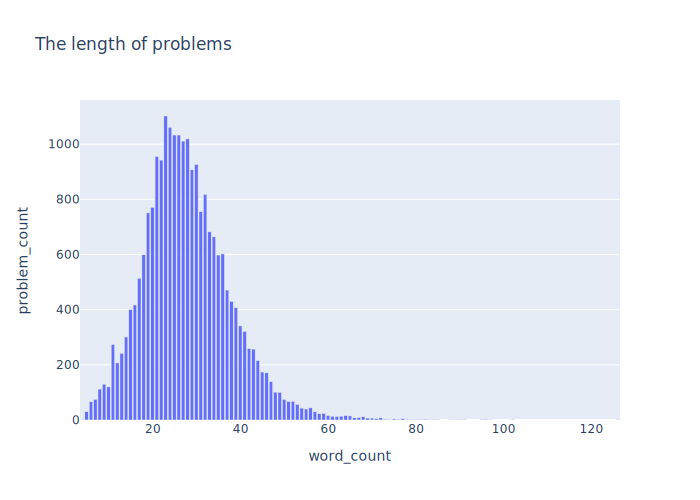

In [8]:
cnt = data['word_count'].value_counts().reset_index()
cnt.columns = [ 'word_count' , 'problem_count']

fig = px.bar(
    cnt , x = 'word_count', y = 'problem_count' ,
    title = 'The length of problems'
)
fig.show('svg')

## Delete stopword

In [9]:
def get_stopword():
    s = set()
    with open("../raw_data/stopword/stopword.txt","r",encoding="UTF-8") as f:
        for line in f:
            s.add(line.strip())
    return s

def delete_stopword(words):
    return [w for w in words if (w not in stopword)]

stopword=get_stopword()
data['content']=data['content'].apply(delete_stopword)
data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17


## The keywords

Keywords may show us the topic of problem sometimes.They are useful for our analysis.
This report use textrank algorithm in 'jieba'. because length of problem are usually short ,TF/IDF may be not suitable for this dataset.

In [10]:
import jieba.analyse
def get_keyword(text):
    topk = min(3,len(text))
    keyword = [word for word in jieba.analyse.textrank(text, topK = topk)]
    return keyword

data['keywords'] = data['original_text'].apply(get_keyword)
data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count,keywords
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24,"[甲数, 商是, 乙数]"
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63,"[路程, 前进, 小时]"
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28,"[角有书, 图书]"
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38,"[小时, 相距, 已知]"
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17,"[苹果树, 果园]"


## Topic Prediction

Classify problems by their topics may be helpful for models and analyse the result of models in different fields.
Because there're no labels in original data, unsupervised algorithm LDA may be suitable.

In [11]:
from gensim import corpora, models

all_words = []
for text in data['content']:
    all_words.append(text)
#print(all_words)
dictionary = corpora.Dictionary(all_words)
corpus = [dictionary.doc2bow(text) for text in all_words]

lda = models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 5)

print('keywords of topics')
for topic in lda.print_topics(num_words = 5):
    print(topic)


keywords of topics
(0, '0.067*"米" + 0.018*"学校" + 0.016*"长" + 0.013*"学生" + 0.013*"分钟"')
(1, '0.060*"千米" + 0.057*"小时" + 0.026*"棵" + 0.024*"行" + 0.020*"数"')
(2, '0.026*"页" + 0.025*"修" + 0.025*"千克" + 0.024*"米" + 0.014*"天"')
(3, '0.041*"千克" + 0.031*"吨" + 0.022*"生产" + 0.017*"计划" + 0.015*"苹果"')
(4, '0.117*"元" + 0.030*"买" + 0.019*"钱" + 0.014*"原价" + 0.011*"女生"')


In [12]:

topic = []
for i,values in enumerate(lda.inference(corpus)[0]):
    topic_val = 0
    topic_id = 0
    for tid, val in enumerate(values):
        if val > topic_val:
            topic_val = val
            topic_id = tid
    topic.append(topic_id)
data['topic'] = topic
data.head(10)

,id,original_text,equation,segmented_text,content,verbs,word_count,keywords,topic
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24,"[甲数, 商是, 乙数]",3
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63,"[路程, 前进, 小时]",1
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28,"[角有书, 图书]",3
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38,"[小时, 相距, 已知]",1
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17,"[苹果树, 果园]",1
5,5901,某班学生参加数学兴趣小组，其中，参加的男生是全班人数的20%，参加的女生是全班人数的(2/7...,x=(5-2)/(20%+(2/7)+(3/5)-1),某班 学生 参加 数学 兴趣小组 ， 其中 ， 参加 的 男生 是 全班 人数 的 20% ...,"[某班, 学生, 参加, 数学, 兴趣小组, 参加, 男生, 全班, 人数, 20%, 参加...","[参加, 参加, 是, 参加, 是, 参加, 有]",55,"[参加, 全班, 人数]",0
6,12815,某商店有36筐苹果，每筐重40千克，运来的苹果重量是梨的8倍，运来梨多少千克？,x=36*40/8,某 商店 有 36 筐 苹果 ， 每 筐 重 40 千克 ， 运 来 的 苹果 重量 是 梨...,"[商店, 36, 筐, 苹果, 每筐, 重, 40, 千克, 运来, 苹果, 重量, 梨, ...","[有, 运来, 是, 运来]",27,"[苹果, 重量, 运来]",3
7,19584,阳光小学举行少先队队仪式比赛，全校共有720名少先队员，平均分成15个中队，每个中队又分成4...,x=720/15/4,阳光 小学 举行 少先队 队 仪式 比赛 ， 全校 共有 720 名 少先队员 ， 平均 分...,"[阳光, 小学, 少先队, 队, 仪式, 比赛, 全校, 共有, 720, 名, 少先队员,...","[举行, 共有, 分成, 分成, 分, 有]",36,"[仪式, 比赛, 少先队员]",2
8,10773,大猴有9只，小猴比大猴多4只，小猴有多少只．,x=9+4,大 猴 有 9 只 ， 小 猴 比 大 猴 多 4 只 ， 小 猴 有 多少 只 ．,"[大猴, 小猴, 比大猴, 小猴]","[有, 有]",16,[],2
9,22037,一根电线，用去(3/5)米，用去的比剩下的少(1/4)米，这根电线原来有多长？,x=(3/5)+(1/4)+(3/5),一 根 电线 ， 用 去 (3/5) 米 ， 用 去 的 比 剩下 的 少 (1/4) 米 ...,"[一根, 电线, 米, 剩下, 少, 米, 这根, 电线, 多长]","[去, 用去, 剩下, 有]",32,"[用去, 电线, 剩下]",0


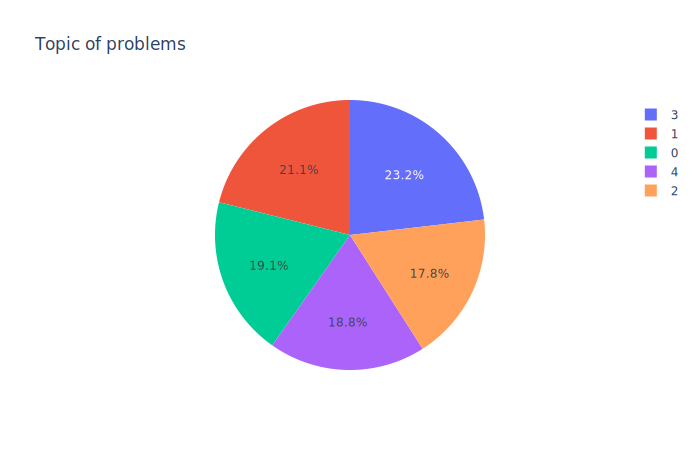

In [13]:
output = data['topic'].value_counts().reset_index()
output.columns=['topic_id','number of problems']

fig = px.pie(
    output,
    names = 'topic_id',
    values = 'number of problems',
    title = 'Topic of problems'    
)

fig.show("svg")

## Number of operators

If you know how many operators are there in equations, it may be much easier for you to solve math word problems.Especially when your algorithm are based on equation templates.

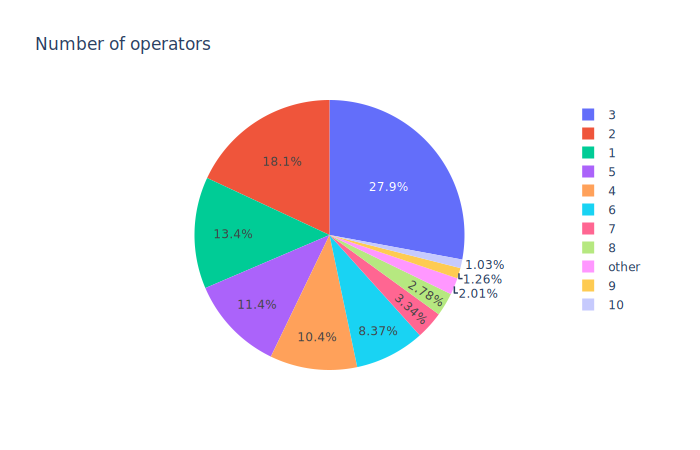

In [14]:
def num_of_operators(equation):
    cnt = 0
    for op in equation:
        if op =='(' or op == '+' or op == '-' or op == '*' or op == '/' or op == '^':
            cnt += 1
    return cnt

tmp = data.loc[:,['equation']]
tmp['operators_cnt'] = tmp['equation'].apply(num_of_operators)
cnt = tmp['operators_cnt'].value_counts().reset_index()
output = cnt.head(10)
other_sum = cnt['operators_cnt'].sum() - output['operators_cnt'].sum()

output = output.sort_values(['operators_cnt'])
output.loc[10] = ['other', other_sum]

output.columns=['number of operators','number of problems']

fig = px.pie(
    output,
    names = 'number of operators',
    values = 'number of problems',
    title = 'Number of operators'    
)

fig.show("svg")

## Evaluate difficulty

Different problems have different difficulty.People may choose different way to solve problems when difficulty of problems are different,and so is AI.To evaluate difficulty of problems, the kinds of operators in equations may be useful.Value of them are as follows.

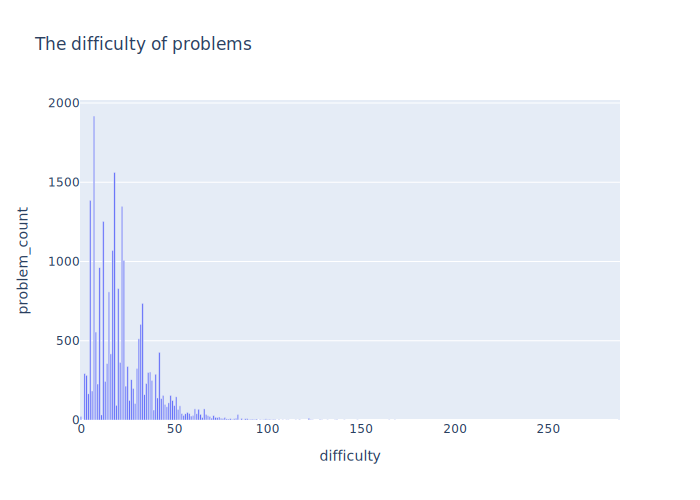

In [9]:
def calc_difficulty(equation):
    difficulty = 0

    def eval(x):
        if x == '+' : return 2
        elif x == '-' : return 3
        elif x == '*' : return 5
        elif x == '/' : return 7
        elif x == '(' : return 8
        elif x == '%' : return 5
        elif x == '^' : return 6
        else : return 0

    for op in equation:
        difficulty += eval(op)
    return difficulty


data['difficulty'] = data['equation'].apply(calc_difficulty)

cnt = data['difficulty'].value_counts().reset_index()
cnt.columns = [ 'difficulty' , 'problem_count']

fig = px.bar(
    cnt , x = 'difficulty', y = 'problem_count' ,
    title = 'The difficulty of problems'
)
fig.show('svg')

## The most difficult problems

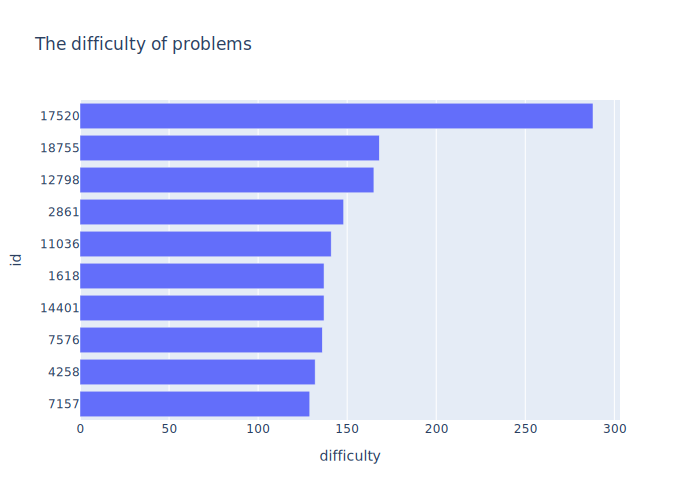

In [10]:
tmp = data[['id','original_text','difficulty']]
tmp = tmp.sort_values(['difficulty']).tail(10)
tmp ['id'] = tmp['id'] . astype(str)
fig = px.bar(
    tmp , x = 'difficulty', y = 'id' ,
    orientation = 'h',
    title = 'The difficulty of problems'
)
fig.show('svg')

## Simplify expressions

Algorithm based on templates will find templates in equations at first.To find templates, we should simplify expressions first.'+' means operator '+' or '-', '\*' means operator '\*' or '/', 'n' means a number.


In [17]:
from pythonds.basic.stack import Stack


def simplify(expr): 
    n = len(expr)
    output = ''
    flag = True
    for i in range(2,n):
        if flag and (expr[i].isdigit() or expr[i] == '.' or expr[i] == '%'):
            output = output + 'n'
            flag = False
        if not (expr[i].isdigit() or expr[i] == '.' or expr[i] == '%'):
            if expr[i] == '[' or expr[i] == '{':
                output = output + '('
            elif expr[i] == ']' or expr[i] == '}':
                output = output + ')'
            elif expr[i] == '-':
                output = output + '+'
            elif expr[i] == '/':
                output = output + '*'
            else: output = output + expr[i]
            flag = True
    return output
    
data['post_expression'] = data['equation'].apply(simplify)

## Count of numbers in equations

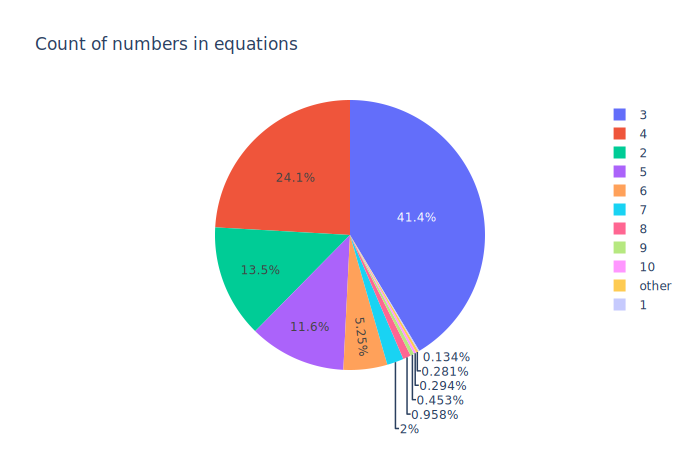

In [18]:
def CountNum(expr):
    cnt = 0
    for x in expr:
        if x == 'n':
            cnt = cnt + 1
    return cnt


tmp = data.loc[:,['post_expression','original_text']]
tmp['number_cnt'] = tmp['post_expression'].apply(CountNum)


cnt = tmp['number_cnt'].value_counts().reset_index()
output = cnt.head(10)
other_sum = cnt['number_cnt'].sum() - output['number_cnt'].sum()

output = output.sort_values(['number_cnt'])
output.loc[10] = ['other', other_sum]

output.columns=['count of numbers','number of problems']

fig = px.pie(
    output,
    names = 'count of numbers',
    values = 'number of problems',
    title = 'Count of numbers in equations'    
)

fig.show("svg")    




## Are numbers in equations as many as in problems?
This result shows that about half of problems have useless parameters or potential parameters in problems

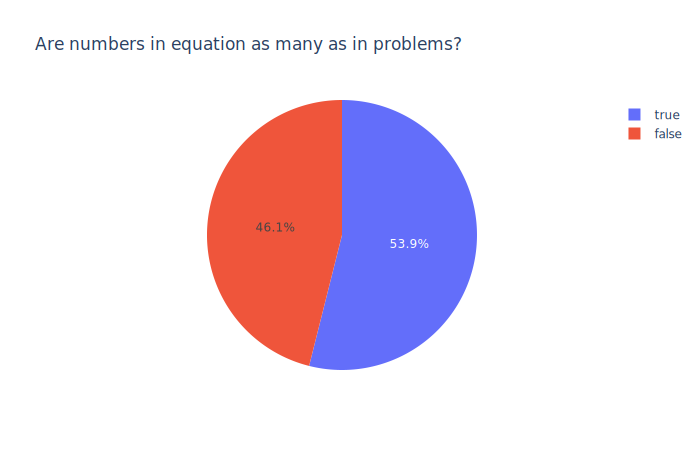

In [19]:
def NuminProb(text):
    prob = str(text)
    cnt = 0
    flag = True
    
    for w in prob:
        if w.isdigit() or w == '.' or w == '%':
            if flag:
                cnt += 1
                flag = False
        else:
            flag =True
    return cnt

def isSame(a, b):
    if a == b:
        return True
    else:
        return False

tmp['num_in_prob'] = tmp['original_text'].apply(NuminProb)
tmp['same count'] = tmp.apply(lambda row: isSame(row['number_cnt'], row['num_in_prob']), axis=1)
same = tmp['same count'].value_counts().reset_index()

fig = px.pie(
    same,
    names = 'index',
    values = 'same count',
    title = 'Are numbers in equation as many as in problems?'    
)
fig.show("svg")   

## Postfix expressions
Some algorithm need postfix expressions instead of infix expressions.The reasons for that may be postfix expressions can help us build expression trees,and there are no brackets in postfix expressions,so postfix expressions can merge some template.

In [20]:
def InfixToPostfix(infixexpr):
    prec = {}
    prec['^'] = 4
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1

    opstack = Stack()
    postfixList = []

    for token in infixexpr:
        if token == 'n':
            postfixList.append(token)
        elif token == "(":
            opstack.push(token)
        elif token == ")":
            topstack = opstack.pop()
            while topstack != "(":
                postfixList.append(topstack)
                if opstack.isEmpty():
                    print(infixexpr)
                else :
                    topstack = opstack.pop()
        else:
            while (not opstack.isEmpty()) and (prec[opstack.peek()] >= prec[token]):
                postfixList.append(opstack.pop())
            opstack.push(token)
    while not opstack.isEmpty():
        postfixList.append(opstack.pop())
    return ''.join(postfixList)


data['post_expression'] = data['post_expression'].apply(InfixToPostfix)

data.head()

,id,original_text,equation,segmented_text,content,verbs,word_count,keywords,topic,difficulty,post_expression
0,946,甲数除以乙数的商是1.5，如果甲数增加20，则甲数是乙的4倍．原来甲数=．,x=20/(4-1.5)*1.5,甲 数 除以 乙 数 的 商 是 1.5 ， 如果 甲 数 增加 20 ， 则 甲 数 是 ...,"[甲数, 除以, 乙数, 商是, 1.5, 甲数, 增加, 20, 甲数, 乙, 倍, 甲数]","[增加, 是]",24,"[甲数, 商是, 乙数]",3,23,nnn+*n*
1,21227,客车和货车分别从A、B两站同时相向开出，5小时后相遇．相遇后，两车仍按原速度前进，当它们相距...,x=196/(80%+((3)/(3+2))-1),客车 和 货车 分别 从 A 、 B 两站 同时 相向 开出 ， 5 小时 后 相遇 ． 相...,"[客车, 货车, A, B, 两站, 相向, 开出, 小时, 相遇, 相遇, 两车, 按原,...","[相向, 开出, 相遇, 相遇, 前进, 相距, 行, 已行, 未行, 求]",63,"[路程, 前进, 小时]",1,58,nnnnn+*+n+*
2,16892,图书角有书30本，第一天借出了(1/5)，第二天又还回5本，现在图书角有多少本书？,x=30*(1-(1/5))+5,图书 角 有 书 30 本 ， 第一天 借出 了 (1/5) ， 第 二 天 又 还 回 5...,"[图书, 角有, 书, 30, 第一天, 借出, 第二天, 回, 图书, 角有, 本书]","[借出, 回, 有]",28,"[角有书, 图书]",3,33,nnnn*+*n+
3,8502,甲、乙两车同时从相距230千米的两地相向而行，3小时后两车还相距35千米．已知甲车每小时行4...,x=(230-35)/3-48,甲 、 乙 两车 同时 从 相距 230 千米 的 两地 相向 而 行 ， 3 小时 后 两...,"[甲, 乙, 两车, 相距, 230, 千米, 两地, 相向, 而行, 小时, 两车, 相距...","[相距, 相向, 相距, 已知]",38,"[小时, 相距, 已知]",1,21,nn+n*n+
4,23021,果园里有苹果树300棵，比桔树多20%，桔树有多少棵？,x=300/(1+20%),果园 里 有 苹果树 300 棵 ， 比 桔树 多 20% ， 桔树 有 多少 棵 ？,"[果园, 里, 苹果树, 300, 棵, 桔树, 20%, 桔树, 棵]","[有, 有]",17,"[苹果树, 果园]",1,22,nnn+*


## Templates of postfix expressions

Template may be useful to solve math word problems. In fact,many algorithms are based on them.The result shows that 15 kinds of postfix templates can help us solve about 70% of problems.

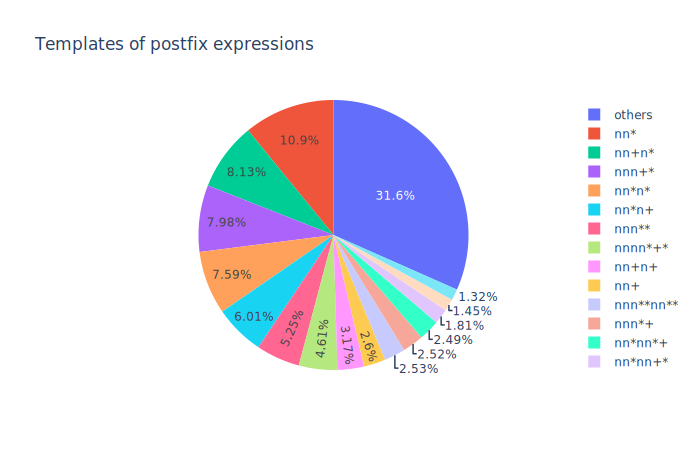

In [21]:
ds = data['post_expression'].value_counts().reset_index()
ds = ds.sort_values(['post_expression'])

output = ds.tail(15)
other_sum = ds['post_expression'].sum() - output['post_expression'].sum()

output.columns = [
    'post_expression',
    'percent'
]

output = output.sort_values(['percent'])
output.loc[15] = ['others', other_sum]

fig = px.pie(
    output,
    names = 'post_expression',
    values = 'percent',
    title = 'Templates of postfix expressions',
)

fig.show("svg")

## Reference
@inproceedings{Liu2019TreestructuredDF,
  title={Tree-structured Decoding for Solving Math Word Problems},
  author={Qianying Liu and Wenyv Guan and Sujian Li and Daisuke Kawahara},
  booktitle={EMNLP/IJCNLP},
  year={2019}
}


@inproceedings{Xie2019AGT,
  title={A Goal-Driven Tree-Structured Neural Model for Math Word Problems},
  author={Zhipeng Xie and Shichao Sun},
  booktitle={IJCAI},
  year={2019}
}

@inproceedings{Wang2019TemplateBasedMW,
  title={Template-Based Math Word Problem Solvers with Recursive Neural Networks},
  author={Lei Wang and D. Zhang and Jipeng Zhang and Xing Xu and L. Gao and B. Dai and H. Shen},
  booktitle={AAAI},
  year={2019}
}

@article{Lee2020SolvingAW,
  title={Solving Arithmetic Word Problems with a Templatebased Multi-Task Deep Neural Network (T-MTDNN)},
  author={D. Lee and G. Gweon},
  journal={2020 IEEE International Conference on Big Data and Smart Computing (BigComp)},
  year={2020},
  pages={271-274}
}